[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Abade_and_Albuquerque_2024/fig_2.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Abade_and_Albuquerque_2024/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Abade_and_Albuquerque_2024/fig_2.ipynb)

#### based on Fig. 2 from Abade & Albuquerque 2024 (QJRMS)  "_Persistent mixed‐phase states in adiabatic cloud parcels under idealised conditions_"

(work in progress - as of now, only bulk partitioning depicted)

https://doi.org/10.1002/qj.4775

In [1]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import si, in_unit
from PySDM.products import WaterMixingRatio
from PySDM_examples.Abade_and_Albuquerque_2024 import Simulation, Settings

In [2]:
simulation = Simulation(Settings(timestep=100 * si.s, n_sd=100))
output = simulation.run(nt=60, steps_per_output_interval=5)

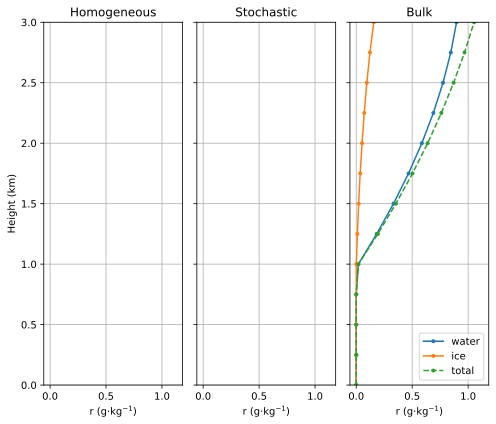

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [4]:
fig, axs = pyplot.subplot_mosaic(
    (('Homogeneous', 'Stochastic', 'Bulk'),),
    figsize=(7, 6),
    sharex=True,
    sharey=True,
    tight_layout=True,
)

ax = None
for label, ax in reversed(axs.items()):
    ax.set_xlabel(r"r (g$\cdot$kg$^{-1}$)")
    ax.set_title(label)
    ax.set_ylim(0, 3)
    ax.grid()
ax.set_ylabel('Height (km)')

values = {}
for product in simulation.products:
    if isinstance(product, WaterMixingRatio):
        liquid_fraction = simulation.particulator.formulae.bulk_phase_partitioning.liquid_fraction(np.asarray(output['T']))
        total_water_mixing_ratio = np.asarray(output['total'])
        values[product.name] = {
            'total': total_water_mixing_ratio,
            'ice': (1 - liquid_fraction) * total_water_mixing_ratio,
            'water': liquid_fraction * total_water_mixing_ratio
        }[product.name]
        axs['Bulk'].plot(
            in_unit(values[product.name], si.g / si.kg),
            in_unit(np.asarray(output['height']), si.km),
            label=product.name,
            marker='.',
            linestyle='--' if product.name == 'total' else '-'
        )
        axs['Bulk'].legend()

show_plot('fig_2.pdf')